In [40]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns',100)

* Age: displays the age of the individual.
* Sex: displays the gender of the individual using the following format :
    1 = male
    0 = female
* Chest-pain type: displays the type of chest-pain experienced by the individual using the following format :
    1 = typical angina
    2 = atypical angina
    3 = non — anginal pain
    4 = asymptotic
* Resting Blood Pressure: displays the resting blood pressure value of an individual in mmHg (unit)
* Serum Cholestrol: displays the serum cholesterol in mg/dl (unit)
* Fasting Blood Sugar: compares the fasting blood sugar value of an individual with 120mg/dl.
    If fasting blood sugar > 120mg/dl then : 1 (true)
    else : 0 (false)
* Resting ECG : displays resting electrocardiographic results
    0 = normal
    1 = having ST-T wave abnormality
    2 = left ventricular hyperthrophy
* Max heart rate achieved : displays the max heart rate achieved by an individual.
* Exercise induced angina :
    1 = yes
    0 = no
* ST depression induced by exercise relative to rest: displays the value which is an integer or float.
* Peak exercise ST segment :
    1 = upsloping
    2 = flat
    3 = downsloping
* Number of major vessels (0–3) colored by flourosopy : displays the value as integer or float.
* Thal : displays the thalassemia :
    3 = normal
    6 = fixed defect
    7 = reversible defect
* Diagnosis of heart disease : Displays whether the individual is suffering from heart disease or not :
    0 = absence
    1, 2, 3, 4 = present.

In [41]:
columnas=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','tgt']


df =pd.read_csv('../data/processed.cleveland.data',names=columnas)

In [42]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,tgt
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [43]:
cont=['age','trestbps','chol','thalach','oldpeak',]
cat=[col for col in df.columns if col not in cont+['tgt']]

In [44]:
cat

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

In [45]:
import missingno as msno

<AxesSubplot:>

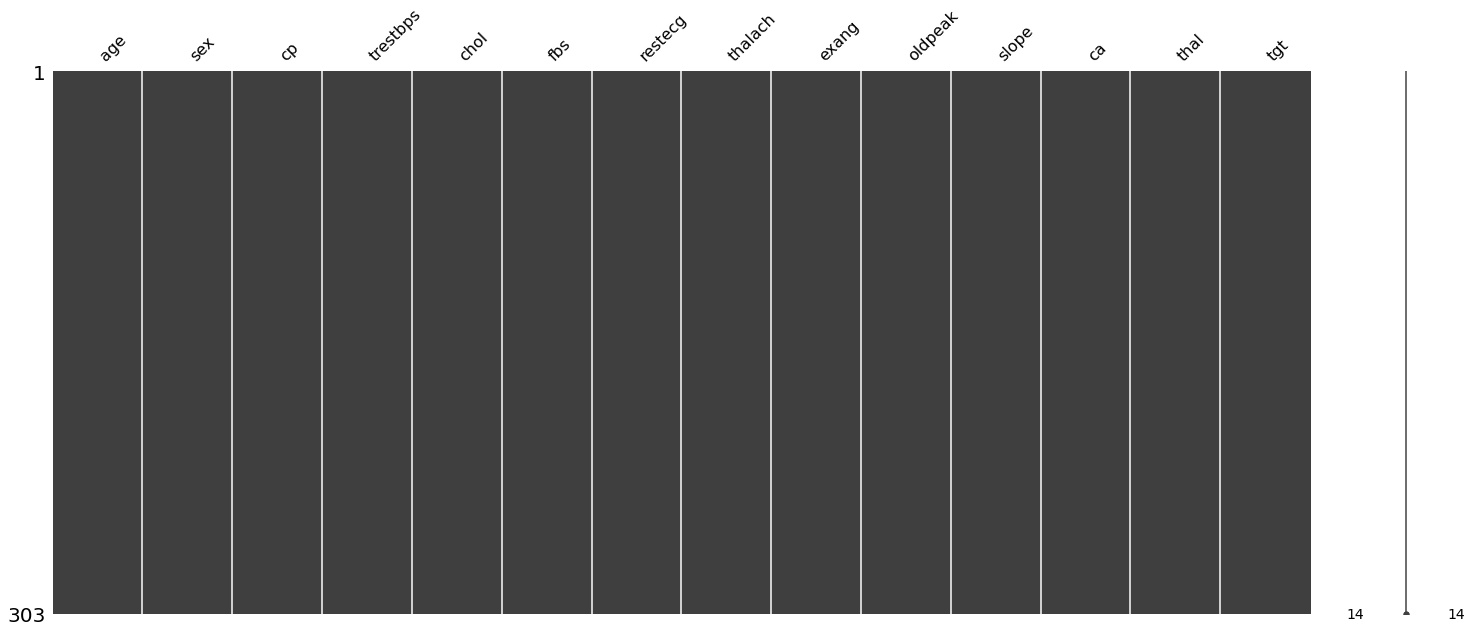

In [46]:
msno.matrix(df)

In [47]:
df['thal'].value_counts()

3.0    166
7.0    117
6.0     18
?        2
Name: thal, dtype: int64

In [48]:
df.replace('?',np.nan,inplace=True)

<AxesSubplot:>

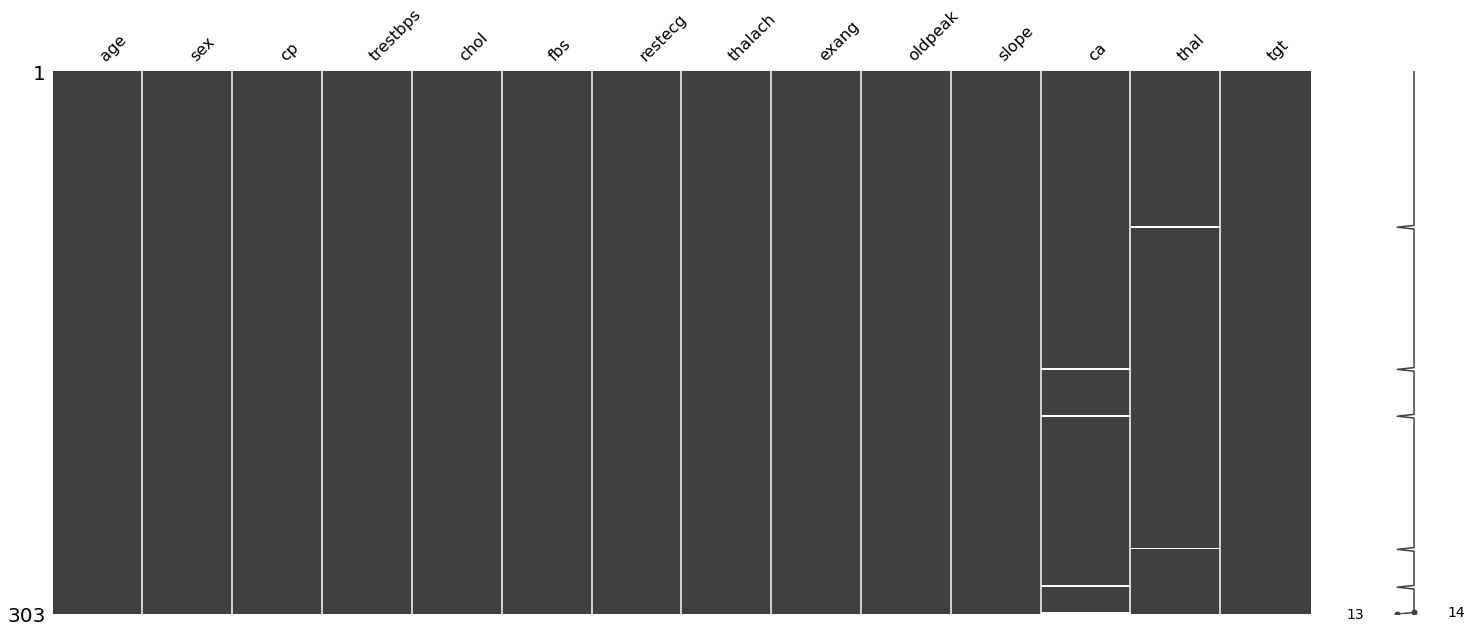

In [49]:
msno.matrix(df)

In [50]:
df.dropna(inplace=True,)

In [51]:
df.reset_index(drop=True,inplace=True)

In [52]:
norm_tgt_dic={k:1 for k in range(2,5)}

In [53]:
norm_tgt_dic

{2: 1, 3: 1, 4: 1}

In [54]:
df['tgt']=df['tgt'].replace(norm_tgt_dic)

In [55]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,tgt
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
293,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
294,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,1
295,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,1


In [56]:
cont

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [57]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'tgt'],
      dtype='object')

In [58]:
df[cont+cat]

,age,trestbps,chol,thalach,oldpeak,sex,cp,fbs,restecg,exang,slope,ca,thal
0,63.0,145.0,233.0,150.0,2.3,1.0,1.0,1.0,2.0,0.0,3.0,0.0,6.0
1,67.0,160.0,286.0,108.0,1.5,1.0,4.0,0.0,2.0,1.0,2.0,3.0,3.0
2,67.0,120.0,229.0,129.0,2.6,1.0,4.0,0.0,2.0,1.0,2.0,2.0,7.0
3,37.0,130.0,250.0,187.0,3.5,1.0,3.0,0.0,0.0,0.0,3.0,0.0,3.0
4,41.0,130.0,204.0,172.0,1.4,0.0,2.0,0.0,2.0,0.0,1.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,57.0,140.0,241.0,123.0,0.2,0.0,4.0,0.0,0.0,1.0,2.0,0.0,7.0
293,45.0,110.0,264.0,132.0,1.2,1.0,1.0,0.0,0.0,0.0,2.0,0.0,7.0
294,68.0,144.0,193.0,141.0,3.4,1.0,4.0,1.0,0.0,0.0,2.0,2.0,7.0
295,57.0,130.0,131.0,115.0,1.2,1.0,4.0,0.0,0.0,1.0,2.0,1.0,7.0


In [59]:
X=df[cont+cat]
y=df[['tgt']]

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 100)

In [61]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [62]:
from sklearn.metrics import roc_auc_score,accuracy_score,confusion_matrix

def metricas(model,Xv,yv): #Mide efectividad de un Modelo Predictivo
    print( " Roc Validate: %.3f" %roc_auc_score(y_score=model.predict_proba(Xv)[:,1],y_true=yv))
    print( " Acc Validate: %.3f" %accuracy_score(y_pred=model.predict(Xv),y_true=yv))
    print( " Matrix Conf Validate: ", "\n",confusion_matrix(y_pred=model.predict(Xv),y_true=yv))

In [63]:
metricas(classifier,X_train,y_train)

 Roc Validate: 1.000
 Acc Validate: 1.000
 Matrix Conf Validate:  
 [[142   0]
 [  0 125]]


In [64]:
metricas(classifier,X_test,y_test)

 Roc Validate: 0.708
 Acc Validate: 0.700
 Matrix Conf Validate:  
 [[12  6]
 [ 3  9]]


In [65]:
DecisionTreeClassifier?

In [66]:
param_grid = {"max_depth": range(1, 5),
              "max_features": ["auto", "sqrt", "log2"],
              "min_samples_leaf": [x/100 for x in range(5, 51, 1)] + [x for x in range(1, 21)], 
              "criterion": ["gini", "entropy"],
              "splitter": ["best", "random"],
              "class_weight": ["balanced", None]}

In [29]:
from sklearn.model_selection import RandomizedSearchCV


In [30]:
Random=RandomizedSearchCV(DecisionTreeClassifier(),param_grid,scoring='roc_auc',n_iter=1000,cv=3,verbose=1,n_jobs=-1,)

In [31]:
Random.fit(X_train,y_train)

Fitting 3 folds for each of 1000 candidates, totalling 3000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 1680 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 3000 out of 3000 | elapsed:    8.7s finished


RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_iter=1000,
                   n_jobs=-1,
                   param_distributions={'class_weight': ['balanced', None],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': range(1, 5),
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [0.05, 0.06, 0.07,
                                                             0.08, 0.09, 0.1,
                                                             0.11, 0.12, 0.13,
                                                             0.14, 0.15, 0.16,
                                                             0.17, 0.18, 0.19,
                                                             0.2, 0.21, 0.22,
                                                             0.23, 0.

In [32]:
best_tree=Random.best_estimator_

In [33]:
best_tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 2,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 10,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

In [34]:
metricas(best_tree,X_train,y_train)

 Roc Validate: 0.829
 Acc Validate: 0.768
 Matrix Conf Validate:  
 [[111  31]
 [ 31  94]]


In [35]:
metricas(best_tree,X_test,y_test)

 Roc Validate: 0.701
 Acc Validate: 0.633
 Matrix Conf Validate:  
 [[10  8]
 [ 3  9]]


In [36]:
best_tree.feature_importances_

array([0.13925542, 0.        , 0.        , 0.        , 0.        ,
       0.05340466, 0.80733992, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

In [37]:
importances=best_tree.feature_importances_

In [38]:
feature_importance= sorted(zip(importances, list(X.columns)), reverse=True)

df_importances = pd.DataFrame(feature_importance, columns=['importance', 'feature'])
importance= list(df_importances['importance'])
feature= list(df_importances['feature'])


In [39]:
df_importances

,importance,feature
0,0.807340,cp
1,0.139255,age
2,0.053405,sex
3,0.000000,trestbps
4,0.000000,thalach
5,0.000000,thal
6,0.000000,slope
7,0.000000,restecg
8,0.000000,oldpeak
9,0.000000,fbs
